#Exploration Analysis and Clustering Project

#Načtení knihoven

In [13]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

#Popis datasetu

Tento dataset obsahuje informace o téměř 9000 držitelích kreditní karty. Zahrnuje 18 atributů:




CUST_ID                               
BALANCE                               
BALANCE_FREQUENCY                     
PURCHASES                             
ONEOFF_PURCHASES                      
INSTALLMENTS_PURCHASES               
CASH_ADVANCE                         
PURCHASES_FREQUENCY                   
ONEOFF_PURCHASES_FREQUENCY            
PURCHASES_INSTALLMENTS_FREQUENCY      
CASH_ADVANCE_FREQUENCY               
CASH_ADVANCE_TRX                     
PURCHASES_TRX                        
CREDIT_LIMIT                          
PAYMENTS                              
MINIMUM_PAYMENTS                    
PRC_FULL_PAYMENT              
TENURE                                

Naším cílem je rozdělit držitele kreditní karty do několika skupin tak, abychom jim následovně mohli poskytovat služby na základě jejich chování.

#Načtení datasetu
Credit card data


In [14]:
df = pd.read_csv('../data/creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#How many missing values do we have in the data?

In [15]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CUST_ID                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
df = df.dropna()
df.isna().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
df = df.iloc[:, 1:]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<Axes: >

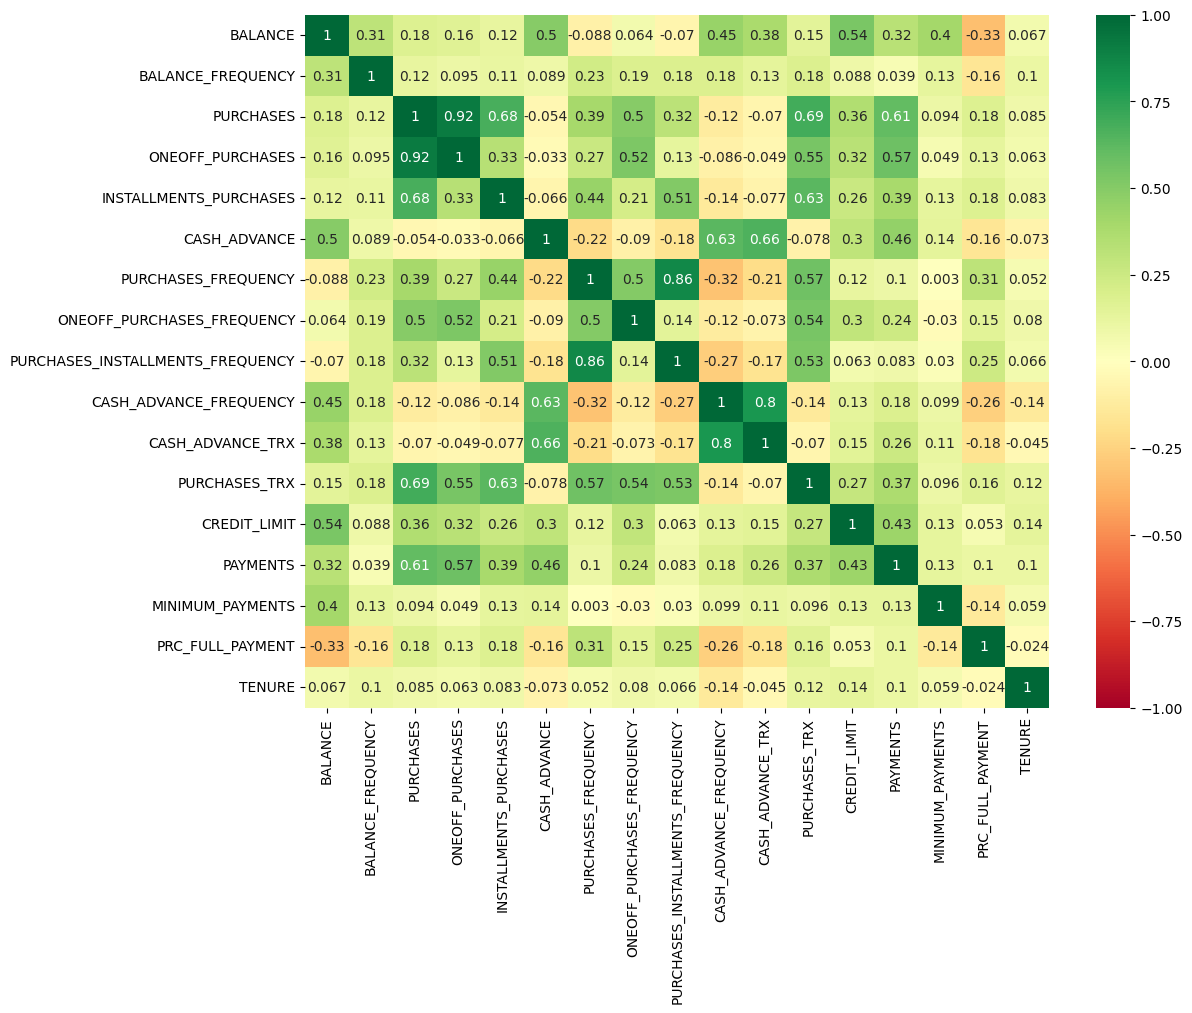

In [18]:
#Heat map
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

#K - means

#Vytvoření modelu

In [19]:
X = df.values

In [20]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13, n_init=10).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [21]:
df_clustering_scores

,sse,silhouette
k,,
2,2.749518e+11,0.511308
3,2.292582e+11,0.465123
4,2.032161e+11,0.460496
5,1.779168e+11,0.394694
6,1.583620e+11,0.371818
7,1.420684e+11,0.369296
8,1.300661e+11,0.383338
9,1.216688e+11,0.351820
10,1.151586e+11,0.351062


<Axes: xlabel='k', ylabel='sse'>

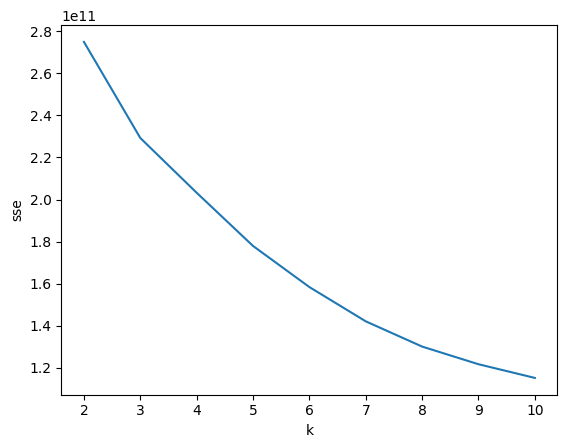

In [22]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

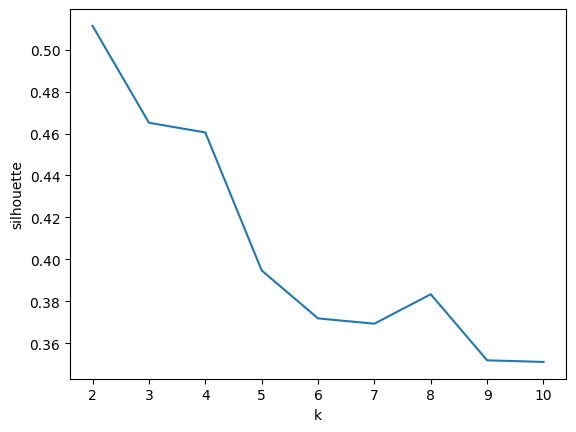

In [23]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

#Trénování modelu

In [24]:
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=13, n_init=10).fit(X)
clustering

KMeans(n_clusters=3, n_init=10, random_state=13)

#Velikost jednotlivých clusterů

In [25]:
pd.Series(clustering.labels_).value_counts()

0    6307
2    2201
1     128
Name: count, dtype: int64

#Přidáme číslo clusteru

In [26]:
df['cluster_id'] = clustering.labels_
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


<Axes: xlabel='cluster_id', ylabel='count'>

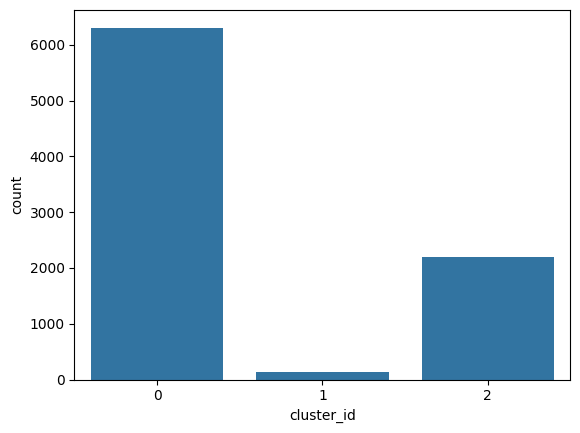

In [27]:
sns.countplot(data=df, x='cluster_id')

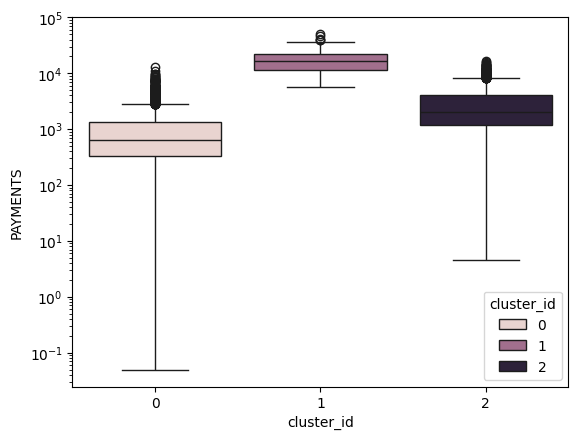

In [28]:
sns.boxplot(data=df, x='cluster_id', y='PAYMENTS', hue='cluster_id')
plt.yscale('log')

<Axes: xlabel='PURCHASES', ylabel='BALANCE'>

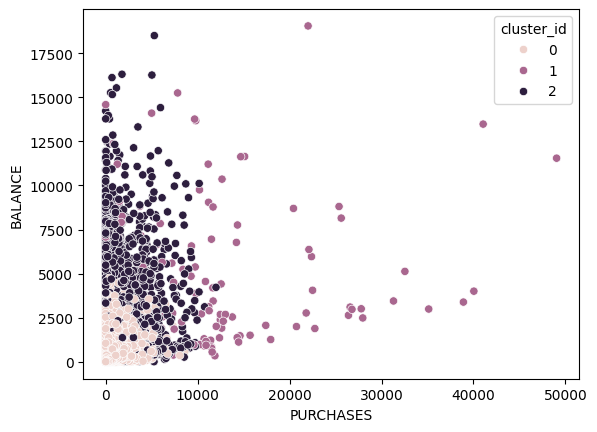

In [ ]:
sns.scatterplot(data=df, x='PURCHASES', y='BALANCE', hue='cluster_id')

#Hirearchical clustering

In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

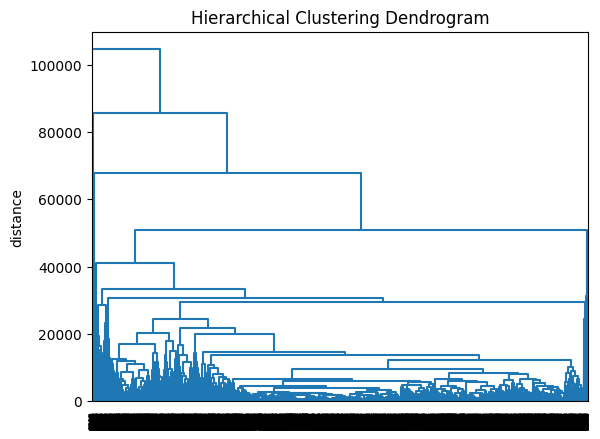

In [31]:
clustering = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=0,
    n_clusters=None
)
clustering.fit(df)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=11)

In [32]:
clustering = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=40000,
    n_clusters=None
)
clustering.fit(df)



AgglomerativeClustering(distance_threshold=40000, linkage='complete',
                        n_clusters=None)

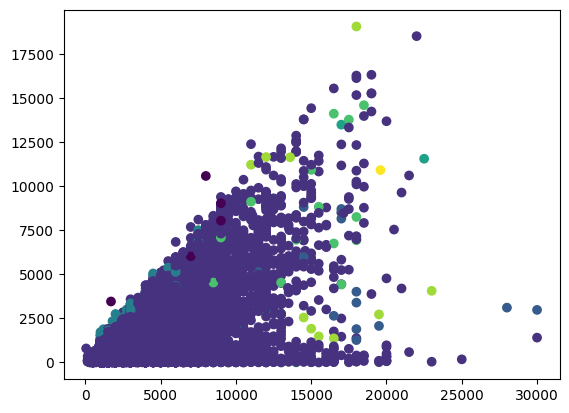

In [ ]:
plt.scatter(df["CREDIT_LIMIT"], df["BALANCE"], c=clustering.labels_)